In [31]:
import numpy as np
import matplotlib.pyplot as plt

## 1 - Mise en Place

Géneration du Probléme-Jouet

In [32]:
def quadratic_problem2d(Lambda):
    A = np.random.rand(2,2)
    Q,R = np.linalg.qr(A)
    L = np.diag(Lambda)
    P = Q.T@L@Q
    # with P definite positive
    q = np.random.rand(2)
    r = np.random.rand(1) 
    return P,q,r

Fonction de Coût

In [22]:
def cost(x):
    
    cout = 0.5 * (x.T @ P @ x) + q.T @ x + r
    
    return cout

Fonction de Gradient

In [24]:
def gradient(x):
    
    grad = P @ x + q
    
    return grad

Méthode de Descente de Gradient

In [29]:
def steepest_descent(x0,cost,gradient,step):
    n = np.linalg.norm(gradient(x0))
    xlist = [x0]
    flist = [cost(x0)]
    nlist = [n]
    k = 0
    
    while n >= 1e-6 and k < 100000:
        d = - gradient(x0)
        x0 = x0 + step*d
        k = k+1
        n = np.linalg.norm(gradient(x0))
        xlist.append(x0)
        flist.append(cost(x0))
        nlist.append(n)
        
          
    return xlist,flist,nlist

Visualisation des Résultats

C:\Users\ferna\AppData\Local\Temp\ipykernel_21740\1528269930.py:41: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


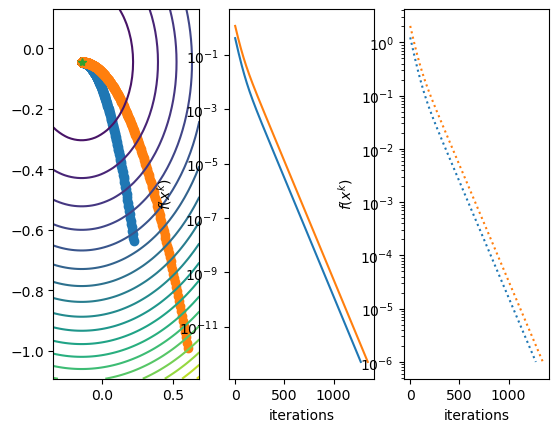

In [30]:
Lambda = np.array((1,2))
np.random.seed(seed=1)
P,q,r= quadratic_problem2d(Lambda)
# check solution existency 
xstar = -np.dot(np.linalg.inv(P),q)
fmin  = cost(xstar)

#grid
ax= xstar[0]
bx = xstar[0]
ay= xstar[1]
by = xstar[1]

for test in range(2):
    x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
    #
 
    xlist,flist,nlist =  steepest_descent(x0,cost,gradient,1e-2)
    xlist = np.asarray(xlist)
    #
    fig = plt.figure(1) 
    plt.subplot(1,3,1)
    plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
#    #
    ax = np.min((xlist[:,0].min(),ax))-.1
    bx = np.max((xlist[:,0].max(),bx))+.1
    ay = np.min((xlist[:,1].min(),ay))-.1
    by = np.max((xlist[:,1].max(),by))+.1
    
    plt.subplot(1,3,2)
    plt.semilogy(range(len(flist)),flist-fmin+1e-16)
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    plt.subplot(1,3,3)
    plt.semilogy(nlist,':')
    plt.xlabel('iterations')
    plt.ylabel(r'$f(x^k)$')
    
    
#    
xgrid = np.arange(ax,bx,(bx-ax)/50)
ygrid = np.arange(ay,by,(by-ay)/50)
X, Y = np.meshgrid(xgrid, ygrid)
Z = np.zeros(X.shape)
for i in range(Z.shape[0]):
    for j in range(Z.shape[1]):
        Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

plt.subplot(1,3,1)
plt.contour(X, Y, Z,21)

plt.plot(xstar[0], xstar[1],'*',label='points')
plt.show()

## 2 - Expérimentations

C:\Users\ferna\AppData\Local\Temp\ipykernel_21740\345016776.py:51: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))


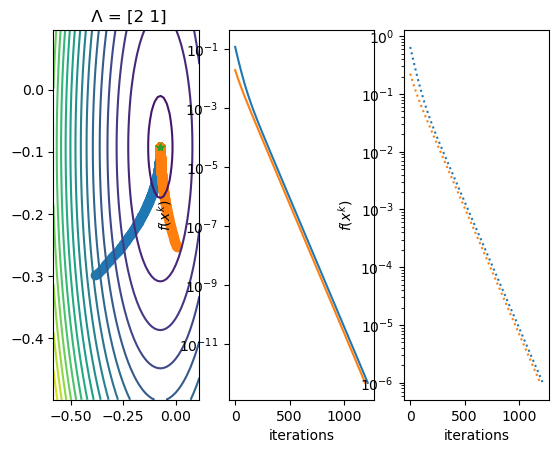

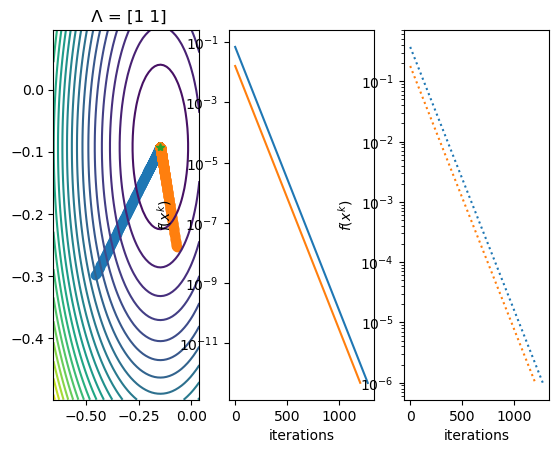

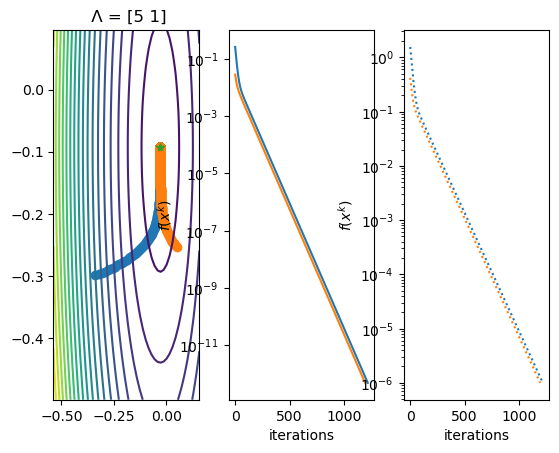

In [38]:
# Definitions de differents Λ
LAMB = np.array([(2,1), (1,1), (5,1)])

# Boucle pour chaque Λ
for lamb in LAMB:
    Lambda = lamb
    np.random.seed(seed=1)
    P,q,r= quadratic_problem2d(Lambda)
    # check solution existency 
    xstar = -np.dot(np.linalg.inv(P),q)
    fmin  = cost(xstar)

    #grid
    ax= xstar[0]
    bx = xstar[0]
    ay= xstar[1]
    by = xstar[1]

    for test in range(2):
        x0 = np.copy(xstar) + 2.*(np.random.rand(2)-.5)
        #
    
        xlist,flist,nlist =  steepest_descent(x0,cost,gradient,1e-2)
        xlist = np.asarray(xlist)
        #
        fig = plt.figure(1) 
        plt.subplot(1,3,1)
        plt.plot(xlist[:,0], xlist[:,1],'o-',label='points')
    #    #
        ax = np.min((xlist[:,0].min(),ax))-.1
        bx = np.max((xlist[:,0].max(),bx))+.1
        ay = np.min((xlist[:,1].min(),ay))-.1
        by = np.max((xlist[:,1].max(),by))+.1
        
        plt.subplot(1,3,2)
        plt.semilogy(range(len(flist)),flist-fmin+1e-16)
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        plt.subplot(1,3,3)
        plt.semilogy(nlist,':')
        plt.xlabel('iterations')
        plt.ylabel(r'$f(x^k)$')
        
        
    #    
    xgrid = np.arange(ax,bx,(bx-ax)/50)
    ygrid = np.arange(ay,by,(by-ay)/50)
    X, Y = np.meshgrid(xgrid, ygrid)
    Z = np.zeros(X.shape)
    for i in range(Z.shape[0]):
        for j in range(Z.shape[1]):
            Z[i,j] = cost(np.array([X[i,j],Y[i,j]]))

    plt.subplot(1,3,1)
    plt.contour(X, Y, Z,21)

    plt.plot(xstar[0], xstar[1],'*',label='points')
    plt.title(" Λ = {}".format(lamb))
    plt.show()